# Stabilité
Nom : Mussard

Prenom : Cassandra

In [1]:
using DifferentialEquations
using Plots
using ODEInterfaceDiffEq
using LinearAlgebra

# 1er cas A = A1

In [2]:
#Fonction permettant de tracer un cercle
function cercle(x,y,rayon, nb_points)
    # param x : coordonnée du centre sur l'axe des abscisses
    #param y : coordonnée du centre sur l'axe des ordonnées
    #param rayon : rayon du cercle
    #param nb_points : nombre de points pour tracer le cercle
    
    theta = LinRange(0,2*pi, nb_points)
    x.+rayon*sin.(theta), y.+rayon*cos.(theta)

end

cercle (generic function with 1 method)

In [3]:
#Fonction permettant de tracer les solutions (trajectoires) ainsi que les différents cercles
function stabilite(A, t0, tf, t, y0)
    #param A : matrice dont il faut calculer la solution
    #param t0 : temps initial
    #param tf : temps final
    #param n : nb de temps calculés
    #param t : temps pour lequel on trace les différents cercles
    #param y0 : condition initial = cercle initial selon la matrice de départ
    
    #Initialisation
    nb_temps = 100
    h = (tf-t0)/nb_temps
    T = zeros(1,nb_temps+1)
    y = zeros(2,nb_temps+1, 10)
    T[1] =  t0
    temps = ones(1,10)
    nb_solution = 10
    
    
    for k in 1:nb_solution
        y[:,1,k] = [y0[1][k], y0[2][k]]
    end
    
    #Calcul de la solution et du temps
    for i in 1:nb_temps
        T[i+1] = T[i] + h
        for j in 1:10
            y[:,i+1, j] = exp(A.*(T[i]-t0))*y[:,1, j]
        end
    end
    
    plot()
    #Plot des cercles 
    for i in 1:10
        plot!(y[1,:, i], y[2,:,i])
    end
    
    #Remplir les cercles
    for i in 1:length(t) 
        plot!(y[1,t[i],:], y[2,t[i],:], fill = (0, 0.8))
    end
    
    plot!(y[1,:, 1], y[2,:, 1], label = [])
end 

stabilite (generic function with 1 method)

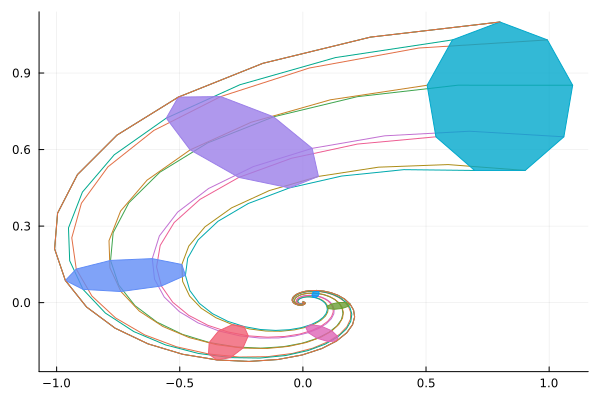

In [4]:
A1 = [-1 -4 ; 1 -1]
t = [1, 5, 10, 15, 20, 25, 30]
y0 = cercle(0.8,0.8,0.3, 10)
t0 = 0
tf = 2*pi*sqrt(3)
p1 = stabilite(A1, t0, tf, t, y0)
plot(p1, legend=false)

# 2ème cas : matrice A = A2

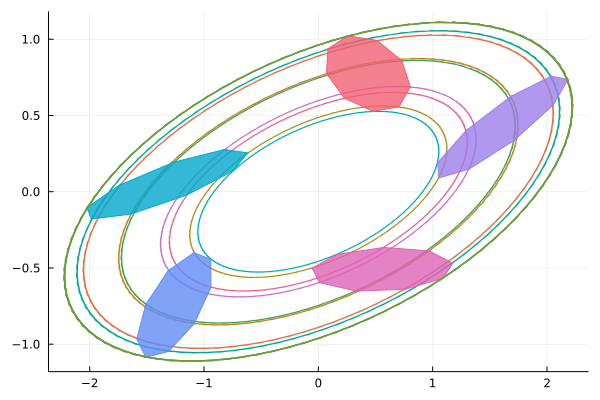

In [5]:
A2 = [1 -4 ; 1 -1]
t = [10, 30, 50, 70, 90]
t0 = 0
tf = 2*pi*sqrt(3)
y0 = cercle(0.8,0.8,0.3, 10)
p2 = stabilite(A2, t0, tf, t, y0) 
plot(p2, legend=false)


# 3ème cas A = A3

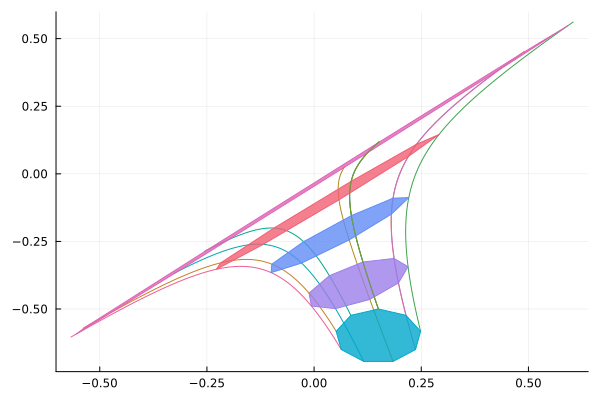

In [6]:
A3 = [1 1 ; 4 -2]
t = [1, 15, 35, 60, 100]
t0 = 0
tf = 1
y0 = cercle(0.15,-0.6,0.1, 10)
p3 = stabilite(A3, t0, tf, t, y0) 
plot(p3, legend=false)